In [2]:
from ALLCools.clustering import *
from ALLCools.mcds import MCDS
from wmb import brain, aibs, broad, mm10

import pandas as pd
import anndata
import numpy as np

import matplotlib.pyplot as plt
from ALLCools.plot import *

import scanpy as sc
from skimage.transform import rotate, SimilarityTransform, matrix_transform

In [3]:
cells = pd.read_csv('rna_cells.txt', index_col=0, header=None).index
cells.name = 'cell'
cells.size

100000

In [5]:
adata_merge = anndata.read_h5ad('./adata/final_with_coords.h5ad')

## plot annot

/opt/conda/lib/python3.7/site-packages/ALLCools/plot/categorical_scatter.py:225: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  **_scatter_kws,
/opt/conda/lib/python3.7/site-packages/ALLCools/plot/categorical_scatter.py:225: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  **_scatter_kws,


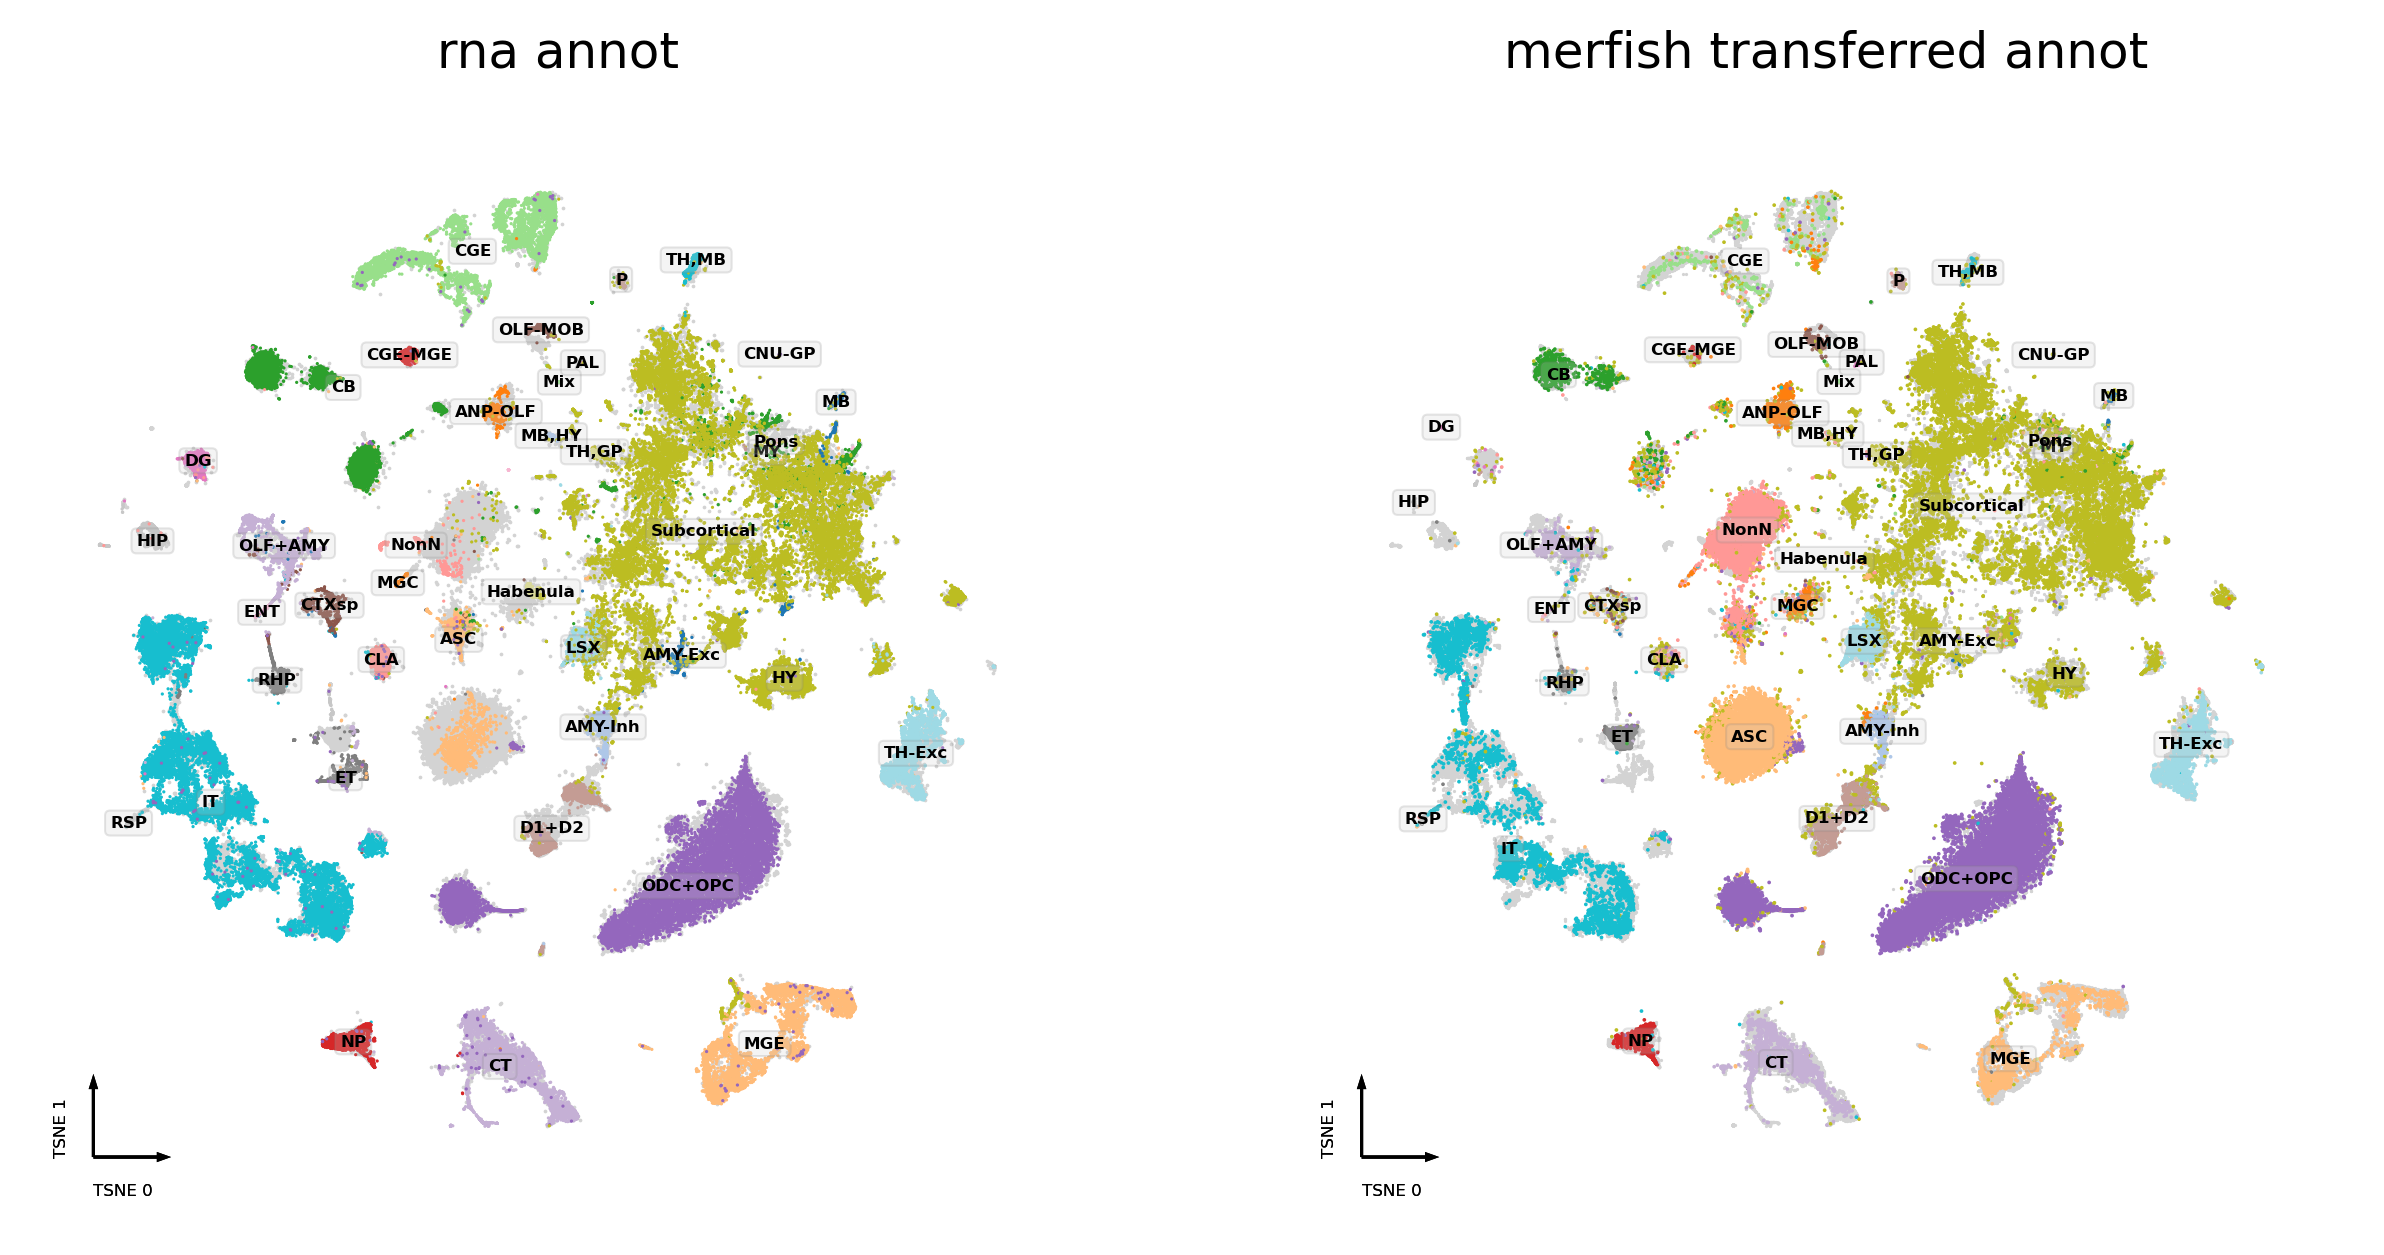

In [22]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(10, 5),dpi=300)

merfish_adata = adata_merge[adata_merge.obs['Modality'] == 'merfish']
rna_adata = adata_merge[adata_merge.obs['Modality'] == 'RNA']

ax = axes[0]
categorical_scatter(data=merfish_adata,
                        coord_base='tsne',
                        max_points=None,
                        hue=None,
                        scatter_kws=dict(color='lightgrey'),
                        ax=ax)

_ = categorical_scatter(
    data=rna_adata,
    ax=ax,
    coord_base='tsne',
    hue='L1_annot',
    text_anno='L1_annot',
    palette='tab20',
    max_points=None,)

ax.set(title = 'rna annot')

    
    
ax = axes[1]
categorical_scatter(data=rna_adata,
                        coord_base='tsne',
                        max_points=None,
                        hue=None,
                        scatter_kws=dict(color='lightgrey'),
                        ax=ax)

_ = categorical_scatter(
    data=merfish_adata,
    ax=ax,
    coord_base='tsne',
    hue='L1_annot_transfer',
    text_anno='L1_annot_transfer',
    palette='tab20',
    max_points=None,
)
ax.set(title = 'merfish transferred annot')

fig.savefig('./fig/integration_annot.png')

## plot gene marker

In [8]:
gene_matrix = pd.read_pickle('rna_gene_matrix.pickle')
gene_matrix = gene_matrix.loc[:,adata_merge.var_names]

FileNotFoundError: [Errno 2] No such file or directory: 'rna_gene_matrix.pickle'

In [ ]:
gene_matrix.head()

In [ ]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(5, 5),dpi=300)

merfish_adata = adata_merge[adata_merge.obs['Modality'] == 'merfish']
rna_adata = adata_merge[adata_merge.obs['Modality'] == 'RNA']


continuous_scatter(data=merfish_adata,
                        coord_base='tsne',
                        max_points=None,
                        hue=None,
                        scatter_kws=dict(color='lightgrey'),
                        ax=ax)

_ = continuous_scatter(
    data=rna_adata,
    ax=ax,
    coord_base='tsne',
    hue=gene_matrix['Adarb2'],
    text_anno='L1_annot',
    max_points=None,)


## plot spatial

In [26]:
adata = anndata.read_h5ad('./adata/merfish_input.h5ad')

In [27]:
adata.obs['annot'] = adata_merge.obs['L1_annot_transfer']

In [28]:
adata.obsm['X_spatial'] = adata.obsm['spatial'].copy()
del adata.obsm['spatial']

In [29]:
# rotate spatial
trans_mat = SimilarityTransform(rotation=15.5)
rotate_coord = matrix_transform(adata.obsm['X_spatial'], np.array(trans_mat))
adata.obsm['X_spatial_rotated'] = rotate_coord.copy()

In [30]:
adata

AnnData object with n_obs × n_vars = 66356 × 494
    obs: 'leiden', 'annot'
    uns: 'leiden', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap', 'X_spatial', 'X_spatial_rotated'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

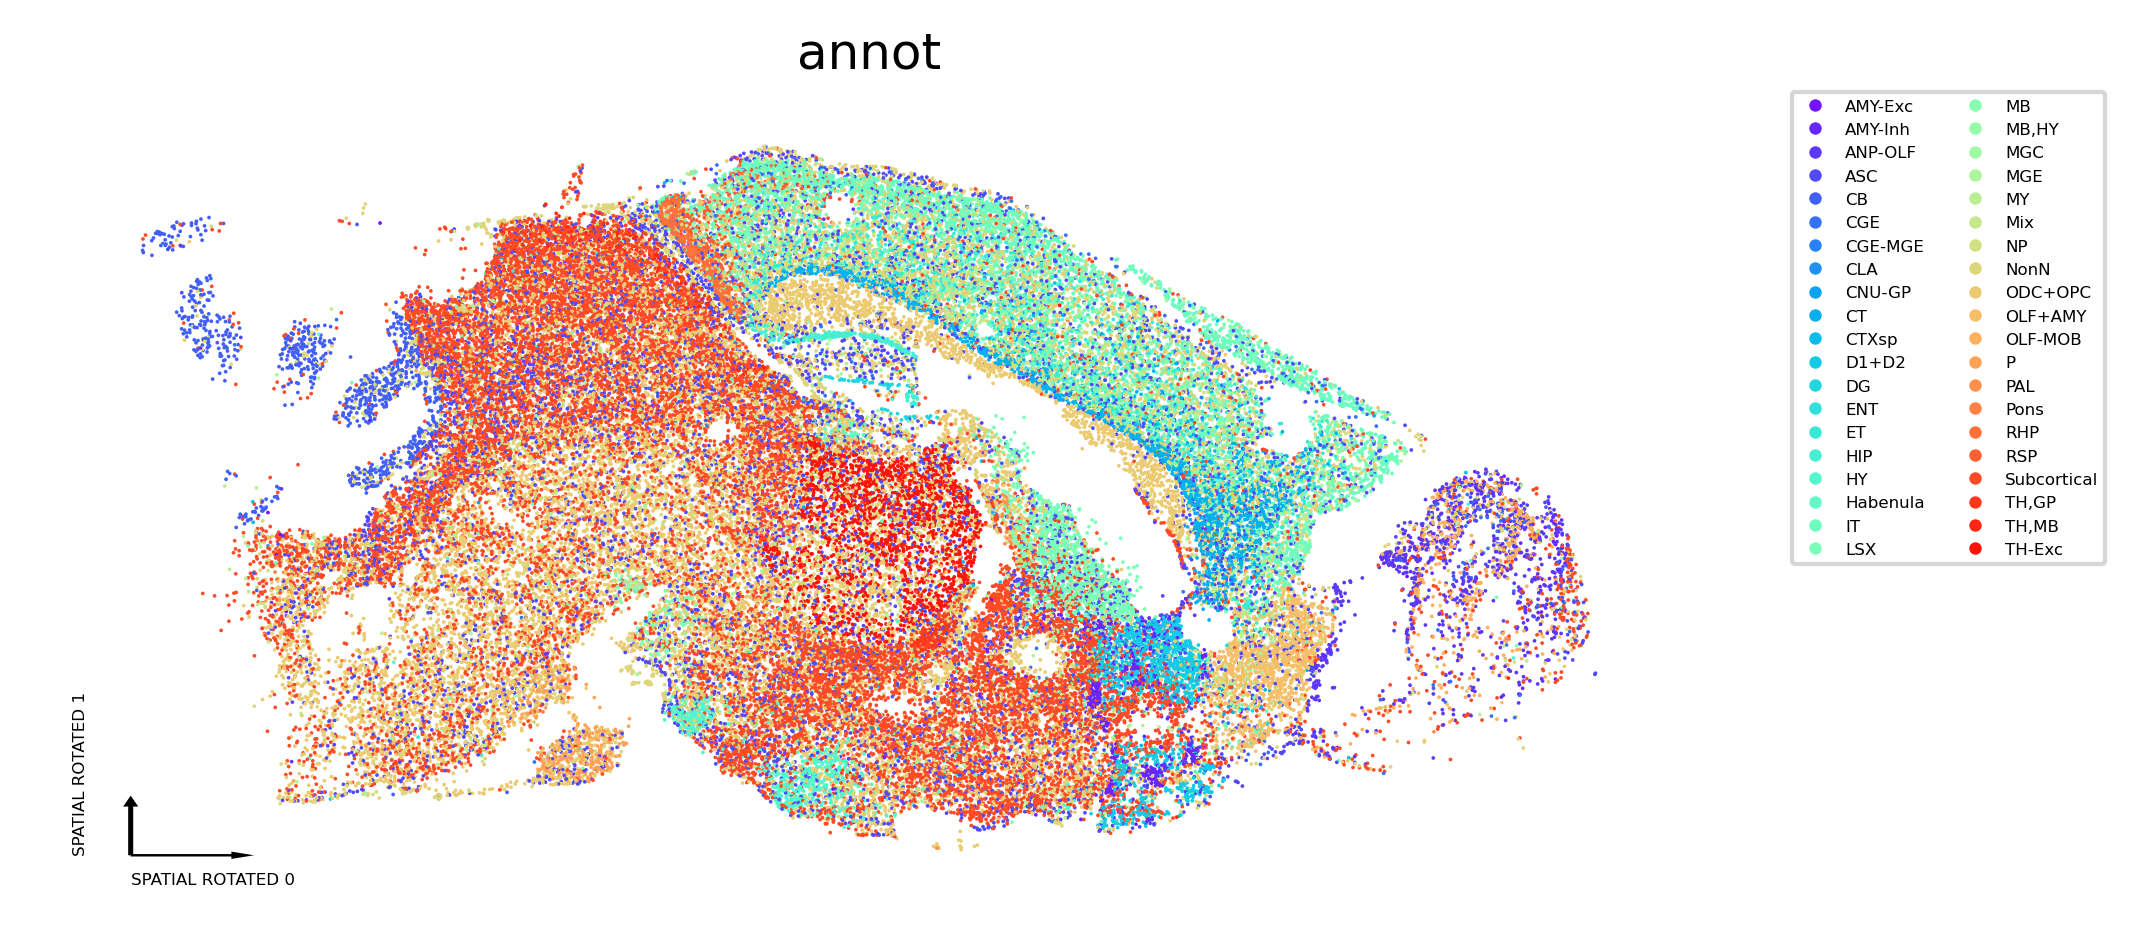

In [31]:
fig, ax = plt.subplots(figsize = (7,3), ncols = 1, dpi = 300, constrained_layout = True)


categorical_scatter(data=adata,
                        ax=ax,
                        coord_base='spatial_rotated',
                        hue='annot',
                    text_anno=None,
                    show_legend = True,
                       max_points = None)

ax.set(title = 'annot')

fig.savefig('./fig/spatial_annot.png')

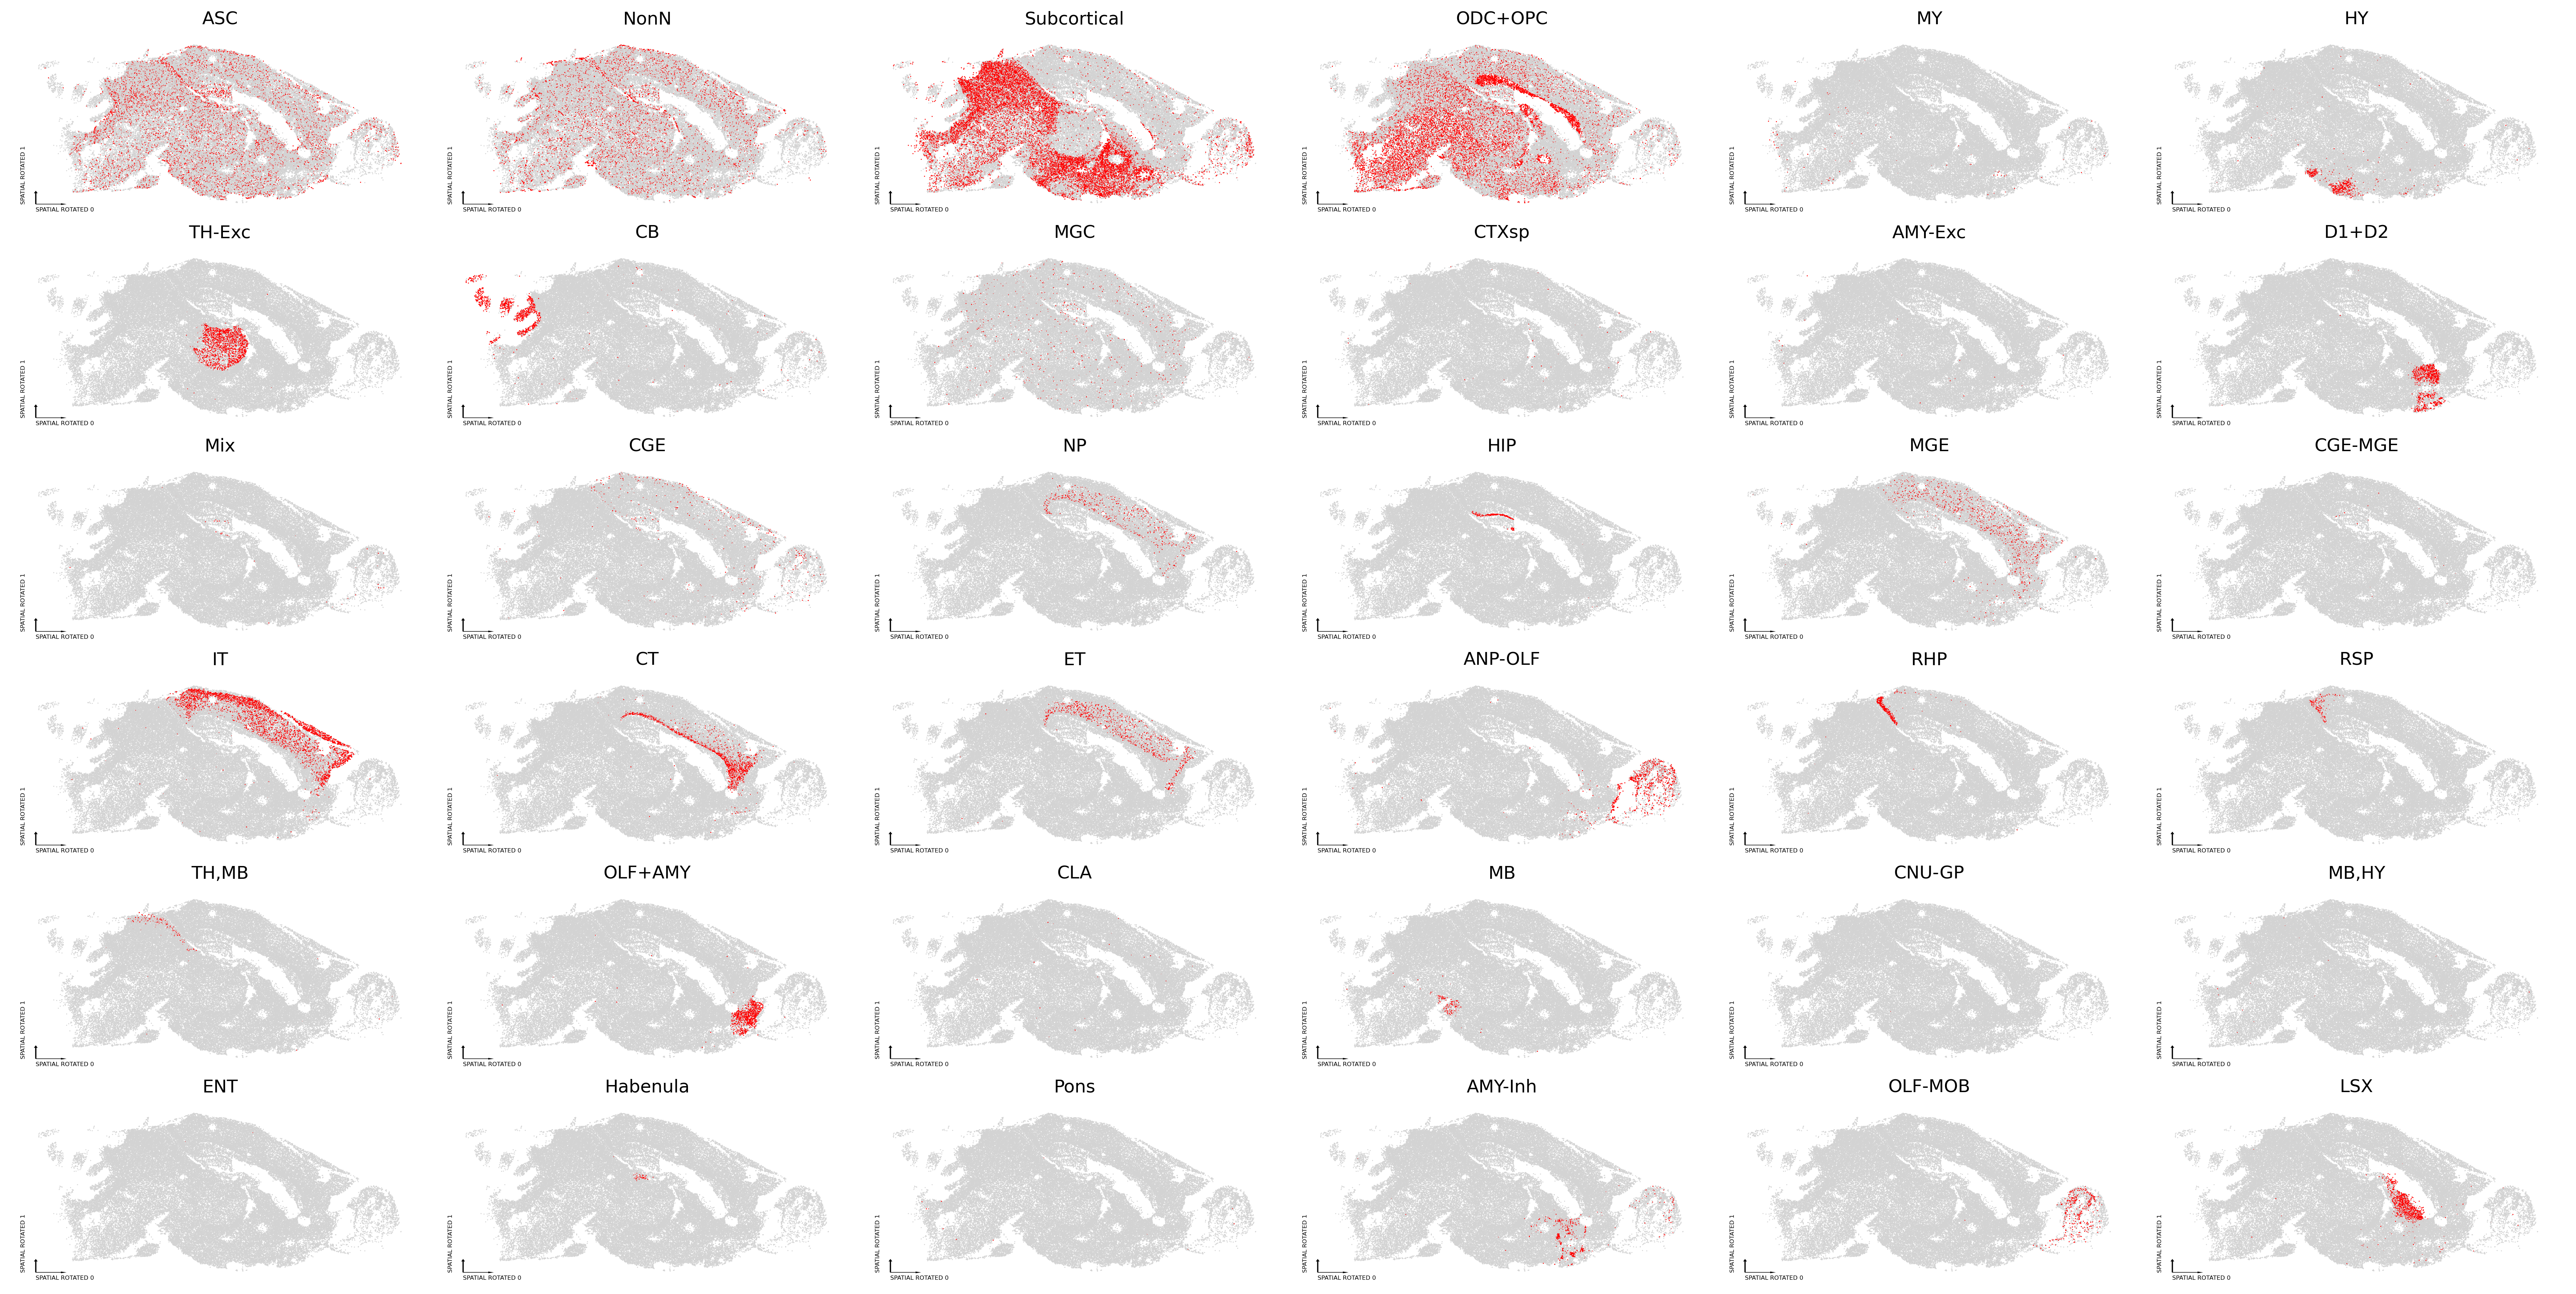

In [32]:
all_cell_types = adata.obs['annot'].unique().to_list()
n_plots = len(all_cell_types)

fig, axes = plt.subplots(figsize=(24, 12),
                         nrows=6,
                         ncols=6,
                         dpi=300,
                         constrained_layout=True,
                         sharex=False)

for ax, ct in zip(axes.ravel(), all_cell_types):
    categorical_scatter(data=adata,
                            ax=ax,
                            coord_base='spatial_rotated',
                            hue=adata.obs['annot'].isin([ct]),
                            #text_anno='leiden',
                            show_legend=False,
                            palette = {
                                        True: 'red',
                                        False: 'lightgrey'
                                    },
                           max_points = None)
    ax.set( title = ct) 
    
for ax in axes.ravel()[n_plots:]:
    ax.axis('off')
    
fig.savefig('./fig/spatial_annot_seperate.png')